# Tutorial for Accessing KEGG with BioServices

This tutorial will guide you through accessing the Kyoto Encyclopedia of Genes and Genomes (KEGG) using the `BioServices` Python package. KEGG is a comprehensive database resource for understanding high-level functions and utilities of the biological system. `BioServices` is a Python package that provides a programmatic interface to many bioinformatics databases.

## Installation

First, you need to install the `bioservices` package. You can install it using pip, the package installer for python. During installation, you will see messages similar to those below.

In [1]:
!pip install bioservices

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.9/191.9 kB 3.7 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 29.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.9/144.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 27.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 10.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 M

## Importing the KEGG Module
After installation, you can import the KEGG service from the bioservices package. Note that this creates a directory.

In [2]:
from bioservices import KEGG

Creating directory /Users/ajaypenugonda/Library/Application Support/bioservices 


Create an instance of the KEGG service, which creates a default interface (**hsa**), which is for humans.

In [3]:
k = KEGG()

Creating directory /Users/ajaypenugonda/Library/Caches/bioservices 
Welcome to Bioservices
It looks like you do not have a configuration file.
We are creating one with default values in /Users/ajaypenugonda/Library/Application Support/bioservices/bioservices.cfg .
Done


## Basic Usage
### Returning Information About the Interface
Since we have already started with the **hsa** interface, we can use the `dbinfo` method to return pertinent information about it. 

In [9]:
k.dbinfo("hsa") #returns the statistics for the hsa interface

'T01001           Homo sapiens (human) KEGG Genes Database\nhsa              Release 110.0+/06-21, Jun 24\n                 Kanehisa Laboratories\n                 24,690 entries\n\nlinked db        pathway\n                 brite\n                 module\n                 ko\n                 genome\n                 enzyme\n                 network\n                 disease\n                 drug\n                 ncbi-geneid\n                 ncbi-proteinid\n                 uniprot\n'

### Listing Databases
Before working in KEGG, it is crucial to understand the databases present. The `dbinfo` method allows us to view the statistics as well as the available datasets in KEGG. Below, the output shows each of the databases and lists the number of entires in it. For example, the pathway database has 1,189,380 entries. 

In [11]:
k.dbinfo(database="kegg")

'kegg             Kyoto Encyclopedia of Genes and Genomes\nkegg             Release 110.0+/06-21, Jun 24\n                 Kanehisa Laboratories\n                 pathway   1,189,380 entries\n                 brite       392,085 entries\n                 module          562 entries\n                 orthology    26,813 entries\n                 genome       24,775 entries\n                 genes     54,775,063 entries\n                 compound     19,357 entries\n                 glycan       11,220 entries\n                 reaction     12,089 entries\n                 rclass        3,194 entries\n                 enzyme        8,158 entries\n                 network       1,549 entries\n                 variant       1,452 entries\n                 disease       2,758 entries\n                 drug         12,455 entries\n                 dgroup        2,473 entries\n'

### Get Entry Information
To retrieve detailed information about a specific entry, such as the insulin signaling pathway for humans, use the `get` method to retrieve this information from the KEGG database. However, first you need to obtain the organism ID for humans (homo  sapiens) from [KEGG's Brite database](https://www.genome.jp/brite/br08611) and the pathway ID from [KEGG's Pathway database](https://www.genome.jp/kegg/pathway.html). Since the organism ID for homo sapiens is "hsa", and the ID for insulin signaling pathway is "04910", the insulin signaling pathway for humans is hsa04910. If you want to obtain insulin signaling pathway for a gorilla, the ID is ggo4910, as the organism ID for a gorilla is "ggo" and the pathway ID is still "04910". Similarly, if you want to obtain detailed information about the cell cycle for an organism, you will see that the corresponding pathway ID is 04110. Combining this with the relevant organism's prefix (such as hsa or ggo) will allow you to obtain information about a specific organism's cell cycle.  

In [8]:
entry = k.get("pathway:hsa04910")
print(entry)

ENTRY       hsa04910                    Pathway
NAME        Insulin signaling pathway - Homo sapiens (human)
DESCRIPTION Insulin binding to its receptor results in the tyrosine phosphorylation of insulin receptor substrates (IRS) by the insulin receptor tyrosine kinase (INSR). This allows association of IRSs with the regulatory subunit of phosphoinositide 3-kinase (PI3K). PI3K activates 3-phosphoinositide-dependent protein kinase 1 (PDK1), which activates Akt, a serine kinase. Akt in turn deactivates glycogen synthase kinase 3 (GSK-3), leading to activation of glycogen synthase (GYS) and thus glycogen synthesis. Activation of Akt also results in the translocation of GLUT4 vesicles from their intracellular pool to the plasma membrane, where they allow uptake of glucose into the cell. Akt also leads to mTOR-mediated activation of protein synthesis by eIF4 and p70S6K. The translocation of GLUT4 protein is also elicited through the CAP/Cbl/TC10 pathway, once Cbl is phosphorylated by INSR.


The above output is a simplified/truncated view of the diagram shown in the [github](https://github.com/AjayPenugonda/BioSparkED/blob/main/KEGG.png).

Similarly, using the `get` method to obtain information about the insulin signaling pathway for gorilla's produces the output shown below.

In [40]:
entry1 = k.get("pathway:ggo04910")
print(entry1)

ENTRY       ggo04910                    Pathway
NAME        Insulin signaling pathway - Gorilla gorilla gorilla (western lowland gorilla)
DESCRIPTION Insulin binding to its receptor results in the tyrosine phosphorylation of insulin receptor substrates (IRS) by the insulin receptor tyrosine kinase (INSR). This allows association of IRSs with the regulatory subunit of phosphoinositide 3-kinase (PI3K). PI3K activates 3-phosphoinositide-dependent protein kinase 1 (PDK1), which activates Akt, a serine kinase. Akt in turn deactivates glycogen synthase kinase 3 (GSK-3), leading to activation of glycogen synthase (GYS) and thus glycogen synthesis. Activation of Akt also results in the translocation of GLUT4 vesicles from their intracellular pool to the plasma membrane, where they allow uptake of glucose into the cell. Akt also leads to mTOR-mediated activation of protein synthesis by eIF4 and p70S6K. The translocation of GLUT4 protein is also elicited through the CAP/Cbl/TC10 pathway, once Cb

### Get a List of Pathways for an Organism:
To get a list of pathways for a specific organism, use the list method with the organism code (e.g., 'hsa' for Homo sapiens):

In [13]:
pathways = k.list("pathway", "hsa")
print(pathways)

hsa01100	Metabolic pathways - Homo sapiens (human)
hsa01200	Carbon metabolism - Homo sapiens (human)
hsa01210	2-Oxocarboxylic acid metabolism - Homo sapiens (human)
hsa01212	Fatty acid metabolism - Homo sapiens (human)
hsa01230	Biosynthesis of amino acids - Homo sapiens (human)
hsa01232	Nucleotide metabolism - Homo sapiens (human)
hsa01250	Biosynthesis of nucleotide sugars - Homo sapiens (human)
hsa01240	Biosynthesis of cofactors - Homo sapiens (human)
hsa00010	Glycolysis / Gluconeogenesis - Homo sapiens (human)
hsa00020	Citrate cycle (TCA cycle) - Homo sapiens (human)
hsa00030	Pentose phosphate pathway - Homo sapiens (human)
hsa00040	Pentose and glucuronate interconversions - Homo sapiens (human)
hsa00051	Fructose and mannose metabolism - Homo sapiens (human)
hsa00052	Galactose metabolism - Homo sapiens (human)
hsa00053	Ascorbate and aldarate metabolism - Homo sapiens (human)
hsa00500	Starch and sucrose metabolism - Homo sapiens (human)
hsa00520	Amino sugar and nucleotide sugar metabo

## Advanced Usage
### Parse KEGG Pathway
The information retrieved from KEGG can be in various formats. For example, to parse the pathway map for visualization or further analysis, you can use the `get` method to obtain the results in a kgml file. Then using the `parse` function of KEGGParser(), you can parse that into a somewhat neater output, shown in the bottommost output below. 

In [42]:
from bioservices.kegg import KEGGParser

pathway_data = k.get("pathway:hsa04910", "kgml")
parser = KEGGParser()
res = k.get("hsa04910")
print(res)
parser.parse(res)

WARNING [bioservices.KEGG:596]:  status is not ok with Not Found


ENTRY       hsa04910                    Pathway
NAME        Insulin signaling pathway - Homo sapiens (human)
DESCRIPTION Insulin binding to its receptor results in the tyrosine phosphorylation of insulin receptor substrates (IRS) by the insulin receptor tyrosine kinase (INSR). This allows association of IRSs with the regulatory subunit of phosphoinositide 3-kinase (PI3K). PI3K activates 3-phosphoinositide-dependent protein kinase 1 (PDK1), which activates Akt, a serine kinase. Akt in turn deactivates glycogen synthase kinase 3 (GSK-3), leading to activation of glycogen synthase (GYS) and thus glycogen synthesis. Activation of Akt also results in the translocation of GLUT4 vesicles from their intracellular pool to the plasma membrane, where they allow uptake of glucose into the cell. Akt also leads to mTOR-mediated activation of protein synthesis by eIF4 and p70S6K. The translocation of GLUT4 protein is also elicited through the CAP/Cbl/TC10 pathway, once Cbl is phosphorylated by INSR.


{'ENTRY': 'hsa04910                    Pathway',
 'NAME': ['Insulin signaling pathway - Homo sapiens (human)'],
 'DESCRIPTION': 'Insulin binding to its receptor results in the tyrosine phosphorylation of insulin receptor substrates (IRS) by the insulin receptor tyrosine kinase (INSR). This allows association of IRSs with the regulatory subunit of phosphoinositide 3-kinase (PI3K). PI3K activates 3-phosphoinositide-dependent protein kinase 1 (PDK1), which activates Akt, a serine kinase. Akt in turn deactivates glycogen synthase kinase 3 (GSK-3), leading to activation of glycogen synthase (GYS) and thus glycogen synthesis. Activation of Akt also results in the translocation of GLUT4 vesicles from their intracellular pool to the plasma membrane, where they allow uptake of glucose into the cell. Akt also leads to mTOR-mediated activation of protein synthesis by eIF4 and p70S6K. The translocation of GLUT4 protein is also elicited through the CAP/Cbl/TC10 pathway, once Cbl is phosphorylated b

### Searching for an Organism
Searching for an organism in KEGG is a very simple process. `BioServices` provides a method that allows you to do this by using `lookfor_organism()`, as long as you have the organism id, which can be found from the [Brite database in KEGG](https://www.genome.jp/brite/br08611). For example, the organism ID for drosophila melanogaster (fruit flies) is "**dros**".  When this organism is searched for using lookfor_organism(), all the entries in the KEGG database that contain the organism ID are returned. In this case, all these entries are from KEGG Brite database.  

In [18]:
k.lookfor_organism("dros")

['T00030 dme Drosophila melanogaster (fruit fly) Eukaryotes;Animals;Arthropods;Insects',
 'T01060 der Drosophila erecta Eukaryotes;Animals;Arthropods;Insects',
 'T01064 dse Drosophila sechellia Eukaryotes;Animals;Arthropods;Insects',
 'T01065 dsi Drosophila simulans Eukaryotes;Animals;Arthropods;Insects',
 'T01068 dya Drosophila yakuba Eukaryotes;Animals;Arthropods;Insects',
 'T01059 dan Drosophila ananassae Eukaryotes;Animals;Arthropods;Insects',
 'T06108 dsr Drosophila serrata Eukaryotes;Animals;Arthropods;Insects',
 'T01032 dpo Drosophila pseudoobscura Eukaryotes;Animals;Arthropods;Insects',
 'T01063 dpe Drosophila persimilis Eukaryotes;Animals;Arthropods;Insects',
 'T06132 dmn Drosophila miranda Eukaryotes;Animals;Arthropods;Insects',
 'T01067 dwi Drosophila willistoni Eukaryotes;Animals;Arthropods;Insects',
 'T01061 dgr Drosophila grimshawi Eukaryotes;Animals;Arthropods;Insects',
 'T01062 dmo Drosophila mojavensis Eukaryotes;Animals;Arthropods;Insects',
 'T05886 daz Drosophila ari

### Looking for Pathways
You can look for pathways using a similar method, called `lookfor_pathway()`. As an example, to know all the pathways that contain "Insulin" in the pathway name, you can use the below:

In [21]:
k.lookfor_pathway("Insulin")

['map04911 Insulin secretion',
 'map04910 Insulin signaling pathway',
 'map04931 Insulin resistance']

There's also a way to look for pathways by entering genes and IDs.

In [24]:
k.find("hsa", "351")

'hsa:100616351\tMIR4670; microRNA 4670\nhsa:100126351\tMIR939, MIRN939, hsa-mir-939, mir-939; microRNA 939\nhsa:124900351\tsmall nucleolar RNA SNORD41\nhsa:124906351\tsmall nucleolar RNA U13\nhsa:124905351\tkeratinocyte proline-rich protein-like\nhsa:124908351\t28S ribosomal RNA\nhsa:6351\tCCL4, ACT2, AT744.1, G-26, HC21, LAG-1, LAG1, MIP-1-beta, MIP1B, MIP1B1, SCYA2, SCYA4; C-C motif chemokine ligand 4\nhsa:10351\tABCA8; ATP binding cassette subfamily A member 8\nhsa:283514\tSIAH3; siah E3 ubiquitin protein ligase family member 3\nhsa:135154\tSDHAF4, C6orf57, Sdh8; succinate dehydrogenase complex assembly factor 4\nhsa:64101\tLRRC4, NAG14, NGL-2; leucine rich repeat containing 4\nhsa:353513\tVCY1B, BPY1B; variable charge Y-linked 1B\nhsa:146456\tTMED6, PRO34237, SPLL9146, p24g5; transmembrane p24 trafficking protein 6\nhsa:23514\tSPIDR, KIAA0146, ODG9; scaffold protein involved in DNA repair\nhsa:11069\tRAPGEF4, CAMP-GEFII, CGEF2, EPAC, EPAC_2, EPAC2, Nbla00496; Rap guanine nucleotide

However, this output is not as neat, and prints as a single string, which is often to difficult to parse. 

### Visualize Pathways
You can also visualize KEGG pathways using additional libraries like networkx and matplotlib. To do so, the parse_kgml_pathway function is used to parse the pathway IDs. This result will then be generated in to a results variable. Then, we search for the number of relations in the results, which will serve as the data for the histogram. Next, we use the hist function to create a histogram with 20 bins that organizes the number of relations per pathway. 

/Users/ajaypenugonda/miniforge3/lib/python3.10/site-packages/bioservices/xmltools.py:95: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  self._soup = bs4.BeautifulSoup(self.data, "lxml")


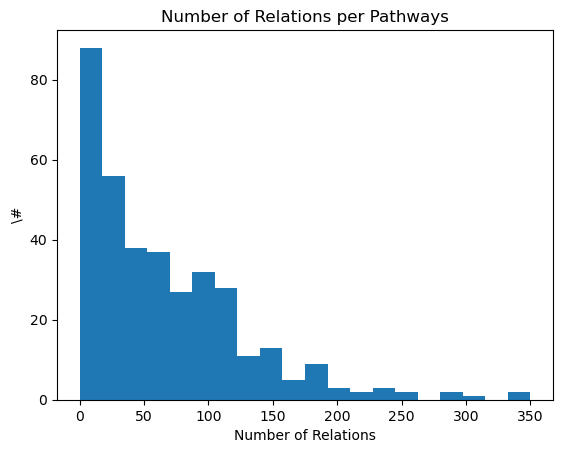

In [30]:
from pylab import *
import matplotlib.pyplot as plt
from bioservices.kegg import KEGG
k = KEGG()
k.organism = "hsa"

results = [k.parse_kgml_pathway(x) for x in k.pathwayIds]
relations = [x['relations'] for x in results]

hist([len(r) for r in relations], 20)
xlabel('Number of Relations')
ylabel('\#')
title("Number of Relations per Pathways")
grid(False)       


## Conclusion
This tutorial provided an overview of how to use the bioservices package to interact with the KEGG database. By following these steps, you can retrieve, parse, and visualize pathway information programmatically, enabling efficient bioinformatics research and analysis. For more advanced functionalities and options, refer to the official [BioServices](https://bioservices.readthedocs.io/en/latest/kegg_tutorial.html) documentation. Using some of the information presented in this tutorial, you can also conduct pathway analysis and gene ontology analysis, using the [Shiny GO](http://bioinformatics.sdstate.edu/go74/) webtool, which will allow you to do analysis simply by inputting a list of genes. You can obtain a list of genes by accessing the KEGG website or by accessing the [ensembl](https://useast.ensembl.org/index.html) database.